# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


# Importing and Understanding Data

In [2]:
train=pd.read_csv('train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
x_test=pd.read_csv('test.csv')
x_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
x_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
x_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
y_test=pd.read_csv('gender_submission.csv')
y_test['Survived']

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

# Exploring Data

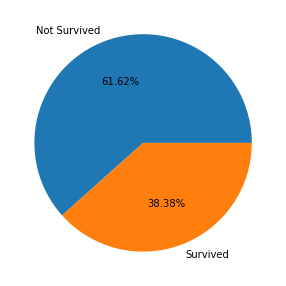

In [9]:
# start with the survival
plt.figure(figsize=(9,5))
plt.pie(train['Survived'].value_counts(),labels=['Not Survived','Survived'],autopct='%.2f%%')
plt.show()

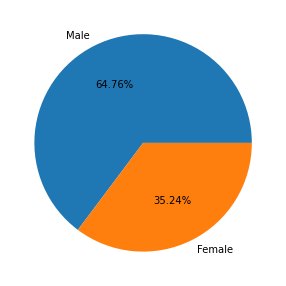

In [10]:
# Next to check sex of the Passenger
plt.figure(figsize=(9,5))
plt.pie(train['Sex'].value_counts(),labels=['Male','Female'],autopct='%.2f%%')
plt.show()

In [11]:
# Checking the age distribution of the passengers
temp=train[train['Age'].notna()]   # Removing All the Null Age data temprary 
temp

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


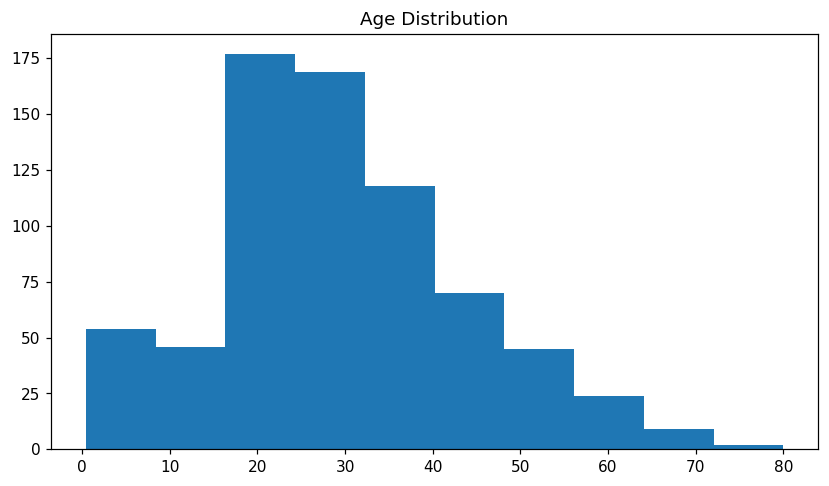

In [12]:
plt.figure(figsize=(9,5),dpi=110)
plt.hist(temp.Age)
plt.title("Age Distribution")
plt.show()


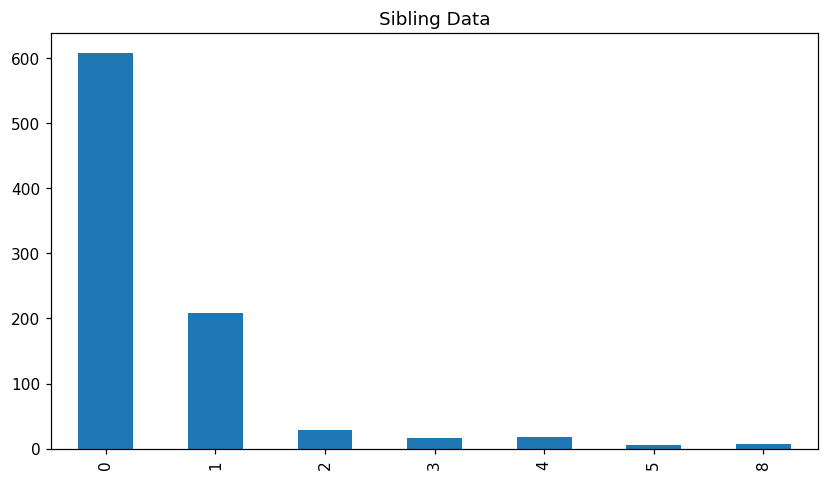

In [13]:
sibs=train.SibSp.value_counts()

sibs=sibs.sort_index() # Sorting based on index
plt.figure(figsize=(9,5),dpi=110)
sibs.plot.bar()
plt.title("Sibling Data")
plt.show()

# Pre-processing & Feature Engineering

In [14]:
train.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Embarked and Cabin has Nill identities and Cabin has the highest number of null values 687/891 so it is better to remove Cabin Column completly.

In [15]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


We will remove Name,PassengerId and Ticket number because it doesn't contain any valuable information.

In [16]:
train=train.drop(['Name','Cabin','PassengerId','Ticket'],axis=1)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [17]:
# Removing the row where embark is NA because only two entities have NA value
train=train[train['Embarked'].notna()]
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


Now Age is really important factor in this analysis so we can not drop it intead we will replace Na with median of the column

In [18]:
med=round(train.Age.mean())
med

30

In [19]:
train.Age.fillna(med,inplace=True) 
train

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,30.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [20]:
# And we are done with removing Nill Values
train.isnull().sum() 

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [21]:
x_test=x_test.drop(['Name','Cabin','PassengerId','Ticket'],axis=1)
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [22]:
x_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [23]:
med=round(x_test.Age.mean())
x_test.Age.fillna(med,inplace=True)
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,30.0,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,30.0,0,0,8.0500,S


In [24]:
test=pd.concat([x_test,y_test],axis='columns')
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,PassengerId,Survived
0,3,male,34.5,0,0,7.8292,Q,892,0
1,3,female,47.0,1,0,7.0000,S,893,1
2,2,male,62.0,0,0,9.6875,Q,894,0
3,3,male,27.0,0,0,8.6625,S,895,0
4,3,female,22.0,1,1,12.2875,S,896,1
...,...,...,...,...,...,...,...,...,...
413,3,male,30.0,0,0,8.0500,S,1305,0
414,1,female,39.0,0,0,108.9000,C,1306,1
415,3,male,38.5,0,0,7.2500,S,1307,0
416,3,male,30.0,0,0,8.0500,S,1308,0


In [46]:
med=x_test.Fare.mean()
med

35.62808038277509

In [53]:
x_test.Fare.isnull().sum()

0

In [47]:
x_test.Fare.fillna(med,inplace=True)
x_test

,Pclass,Female,Male,Age,SibSp,Parch,Fare,C,Q,S
0,3,0,1,34.5,0,0,7.8292,0,1,0
1,3,1,0,47.0,1,0,7.0000,0,0,1
2,2,0,1,62.0,0,0,9.6875,0,1,0
3,3,0,1,27.0,0,0,8.6625,0,0,1
4,3,1,0,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,0,1,30.0,0,0,8.0500,0,0,1
414,1,1,0,39.0,0,0,108.9000,1,0,0
415,3,0,1,38.5,0,0,7.2500,0,0,1
416,3,0,1,30.0,0,0,8.0500,0,0,1


In [54]:
test.isnull().sum()

Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
PassengerId    0
Survived       0
dtype: int64

In [27]:
y_test=test.Survived
x_test=test.drop(['Survived','PassengerId'],axis='columns')
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,30.0,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,30.0,0,0,8.0500,S


In [28]:
x_train=train.drop('Survived',axis=1)
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,30.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [29]:
y_train=train['Survived']
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

## Encoding

In [30]:

# encode RainToday variable



encoder = ce.BinaryEncoder(cols=['Sex'])

x_train = encoder.fit_transform(x_train)

x_test = encoder.transform(x_test)

In [31]:
x_train

,Pclass,Sex_0,Sex_1,Age,SibSp,Parch,Fare,Embarked
0,3,0,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,3,1,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,3,0,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,2,0,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
888,3,1,0,30.0,1,2,23.4500,S
889,1,0,1,26.0,0,0,30.0000,C


In [32]:
x_test

,Pclass,Sex_0,Sex_1,Age,SibSp,Parch,Fare,Embarked
0,3,0,1,34.5,0,0,7.8292,Q
1,3,1,0,47.0,1,0,7.0000,S
2,2,0,1,62.0,0,0,9.6875,Q
3,3,0,1,27.0,0,0,8.6625,S
4,3,1,0,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,3,0,1,30.0,0,0,8.0500,S
414,1,1,0,39.0,0,0,108.9000,C
415,3,0,1,38.5,0,0,7.2500,S
416,3,0,1,30.0,0,0,8.0500,S


In [33]:
x_test.rename(columns = {'Sex_0':'Female', 'Sex_1':'Male'}, inplace = True)  
x_test

,Pclass,Female,Male,Age,SibSp,Parch,Fare,Embarked
0,3,0,1,34.5,0,0,7.8292,Q
1,3,1,0,47.0,1,0,7.0000,S
2,2,0,1,62.0,0,0,9.6875,Q
3,3,0,1,27.0,0,0,8.6625,S
4,3,1,0,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,3,0,1,30.0,0,0,8.0500,S
414,1,1,0,39.0,0,0,108.9000,C
415,3,0,1,38.5,0,0,7.2500,S
416,3,0,1,30.0,0,0,8.0500,S


In [34]:
x_train.rename(columns = {'Sex_0':'Female', 'Sex_1':'Male'}, inplace = True)
x_train

,Pclass,Female,Male,Age,SibSp,Parch,Fare,Embarked
0,3,0,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,3,1,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,3,0,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,2,0,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
888,3,1,0,30.0,1,2,23.4500,S
889,1,0,1,26.0,0,0,30.0000,C


In [35]:
dummy1=pd.get_dummies(x_train.Embarked)
dummy1

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [36]:
x_train=x_train.drop('Embarked',axis='columns')
x_train=pd.concat([x_train,dummy1],axis='columns')
x_train

,Pclass,Female,Male,Age,SibSp,Parch,Fare,C,Q,S
0,3,0,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,3,1,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,3,0,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,0,1,27.0,0,0,13.0000,0,0,1
887,1,1,0,19.0,0,0,30.0000,0,0,1
888,3,1,0,30.0,1,2,23.4500,0,0,1
889,1,0,1,26.0,0,0,30.0000,1,0,0


In [37]:
dummy2=pd.get_dummies(x_test.Embarked)
x_test=x_test.drop('Embarked',axis='columns')
x_test=pd.concat([x_test,dummy2],axis='columns')
x_test

,Pclass,Female,Male,Age,SibSp,Parch,Fare,C,Q,S
0,3,0,1,34.5,0,0,7.8292,0,1,0
1,3,1,0,47.0,1,0,7.0000,0,0,1
2,2,0,1,62.0,0,0,9.6875,0,1,0
3,3,0,1,27.0,0,0,8.6625,0,0,1
4,3,1,0,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,0,1,30.0,0,0,8.0500,0,0,1
414,1,1,0,39.0,0,0,108.9000,1,0,0
415,3,0,1,38.5,0,0,7.2500,0,0,1
416,3,0,1,30.0,0,0,8.0500,0,0,1


It's time.

# Models

Let's try a bunch of machine learning model and find the best model for the task with the highest score.

## Logistic Regression

In [56]:

logreg=LogisticRegression(solver='liblinear',random_state=0)
logreg.fit(x_train,y_train)
y_pred_log=logreg.predict(x_test)
y_pred_log

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [57]:
log_score=logreg.score(x_test,y_test)
log_score

0.9521531100478469

In [58]:
cmat = confusion_matrix(y_test, y_pred_log)

print('Confusion matrix\n\n', cmat)

print('\nTrue Positives(TP) = ', cmat[0,0])

print('\nTrue Negatives(TN) = ', cmat[1,1])

print('\nFalse Positives(FP) = ', cmat[0,1])

print('\nFalse Negatives(FN) = ', cmat[1,0])

Confusion matrix

 [[254  12]
 [  8 144]]

True Positives(TP) =  254

True Negatives(TN) =  144

False Positives(FP) =  12

False Negatives(FN) =  8


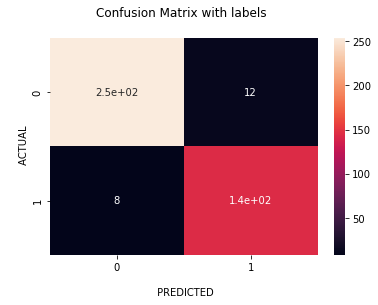

In [59]:
cmp = sns.heatmap(cmat, annot = True)

cmp.set_title('Confusion Matrix with labels \n')
cmp.set_xlabel('\n PREDICTED')
cmp.set_ylabel('\n ACTUAL')
plt.show()

## Random Forest Classifier

In [61]:

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
y_pred_rfc=rfc.predict(x_test)
y_pred_rfc

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [62]:
rfc_score=rfc.score(x_test,y_test)
rfc_score

0.8349282296650717

In [63]:
cmat = confusion_matrix(y_test, y_pred_rfc)

print('Confusion matrix\n\n', cmat)

print('\nTrue Positives(TP) = ', cmat[0,0])

print('\nTrue Negatives(TN) = ', cmat[1,1])

print('\nFalse Positives(FP) = ', cmat[0,1])

print('\nFalse Negatives(FN) = ', cmat[1,0])

Confusion matrix

 [[232  34]
 [ 35 117]]

True Positives(TP) =  232

True Negatives(TN) =  117

False Positives(FP) =  34

False Negatives(FN) =  35


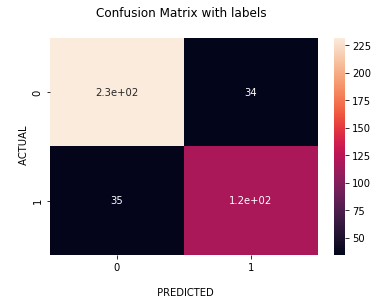

In [64]:
cmp = sns.heatmap(cmat, annot = True)

cmp.set_title('Confusion Matrix with labels \n')
cmp.set_xlabel('\n PREDICTED')
cmp.set_ylabel('\n ACTUAL')
plt.show()

## Gradient Boosting Classifier

In [65]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_pred_gbc=gbc.predict(x_test)
y_pred_gbc

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [66]:
gbc_score=gbc.score(x_test,y_test)
gbc_score

0.8827751196172249

In [67]:


cmat = confusion_matrix(y_test, y_pred_gbc)

print('Confusion matrix\n\n', cmat)

print('\nTrue Positives(TP) = ', cmat[0,0])

print('\nTrue Negatives(TN) = ', cmat[1,1])

print('\nFalse Positives(FP) = ', cmat[0,1])

print('\nFalse Negatives(FN) = ', cmat[1,0])

Confusion matrix

 [[247  19]
 [ 30 122]]

True Positives(TP) =  247

True Negatives(TN) =  122

False Positives(FP) =  19

False Negatives(FN) =  30


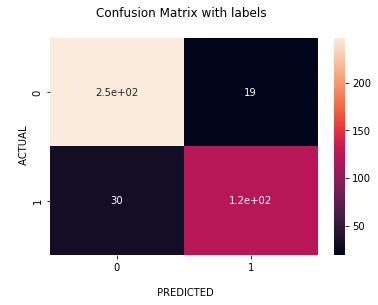

In [68]:
cmp = sns.heatmap(cmat, annot = True)

cmp.set_title('Confusion Matrix with labels \n')
cmp.set_xlabel('\n PREDICTED')
cmp.set_ylabel('\n ACTUAL')
plt.show()

## Decision Tree Classifier

In [69]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
dtc.fit(x_train, y_train)
y_pred_dtc=dtc.predict(x_test)
y_pred_dtc

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [70]:
dtc_score=dtc.score(x_test,y_test)
dtc_score

0.9665071770334929

In [71]:
cmat = confusion_matrix(y_test, y_pred_dtc)

print('Confusion matrix\n\n', cmat)

print('\nTrue Positives(TP) = ', cmat[0,0])

print('\nTrue Negatives(TN) = ', cmat[1,1])

print('\nFalse Positives(FP) = ', cmat[0,1])

print('\nFalse Negatives(FN) = ', cmat[1,0])

Confusion matrix

 [[260   6]
 [  8 144]]

True Positives(TP) =  260

True Negatives(TN) =  144

False Positives(FP) =  6

False Negatives(FN) =  8


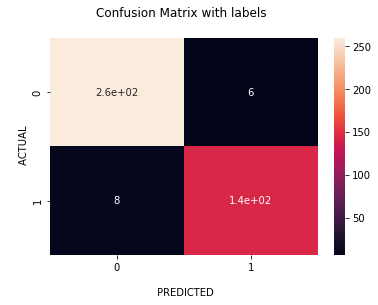

In [72]:
cmp = sns.heatmap(cmat, annot = True)

cmp.set_title('Confusion Matrix with labels \n')
cmp.set_xlabel('\n PREDICTED')
cmp.set_ylabel('\n ACTUAL')
plt.show()

## Gaussian Naive Bayes Classifier

In [73]:
gnb = GaussianNB()
# fit the model
gnb.fit(x_train, y_train)

y_pred_gnb=gnb.predict(x_test)
y_pred_gnb

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [74]:
gnb_score=gnb.score(x_test,y_test)
gnb_score

0.916267942583732

In [75]:
cmat = confusion_matrix(y_test, y_pred_gnb)

print('Confusion matrix\n\n', cmat)

print('\nTrue Positives(TP) = ', cmat[0,0])

print('\nTrue Negatives(TN) = ', cmat[1,1])

print('\nFalse Positives(FP) = ', cmat[0,1])

print('\nFalse Negatives(FN) = ', cmat[1,0])

Confusion matrix

 [[235  31]
 [  4 148]]

True Positives(TP) =  235

True Negatives(TN) =  148

False Positives(FP) =  31

False Negatives(FN) =  4


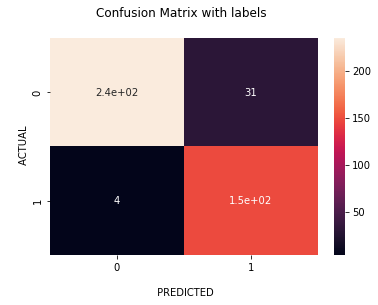

In [76]:
cmp = sns.heatmap(cmat, annot = True)

cmp.set_title('Confusion Matrix with labels \n')
cmp.set_xlabel('\n PREDICTED')
cmp.set_ylabel('\n ACTUAL')
plt.show()

# Comparison and Conclusion

In this callenge I used five different different machine learning techniques for classification. Let's compare these:

In [77]:
print("Logistic Regression Classifier Model accuracy is: ","{:.0%}".format(log_score),"\n")
print("Random Forest Classifier Model accuracy is: ","{:.0%}".format(log_score),"\n")
print("Gradient Boosting Classifier Model accuracy is: ","{:.0%}".format(gbc_score),"\n")
print("Decision Tree Classifier Model accuracy is: ","{:.0%}".format(dtc_score),"\n")
print("Gaussian Naive Bayes Classifier Model accuracy is: ","{:.0%}".format(gnb_score),"\n")

Logistic Regression Classifier Model accuracy is:  95% 

Random Forest Classifier Model accuracy is:  95% 

Gradient Boosting Classifier Model accuracy is:  88% 

Decision Tree Classifier Model accuracy is:  97% 

Gaussian Naive Bayes Classifier Model accuracy is:  92% 



It show that the winner is Decision tree classifier with the model accuracy of 97%.

# Submission

In [78]:
submit=pd.read_csv("gender_submission.csv")
submit

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [80]:
submit.Survived=y_pred_dtc

In [81]:
submit

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [83]:
 submit.to_csv('submission.csv', index=False)
    